<a href="https://colab.research.google.com/github/sarthakpruthi/deep-learning-fastai/blob/master/fastai2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *
import numpy as np

In [0]:
folder="teddys"
initial_file="/content/teddys.txt"
file="teddys.txt"

In [0]:
folder="grizzly"
initial_file="/content/grizzly.txt"
file="grizzly.txt"

In [0]:
folder="black"
initial_file="/content/black.txt"
file="black.txt"

In [0]:
path=Path("data/bears")
dest=path/folder
dest.mkdir(parents=True,exist_ok=True)

In [0]:
download_images(initial_file,dest,max_pics=200)

Error https://www.washingtonpost.com/resizer/fgjFip1l9cKPBwJK3cxC9o9dlMI=/767x0/smart/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/XK6YBT5GSE2LROLN3FO4WRK5JI.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)


In [0]:
classes=["teddys","grizzly","black"]

In [0]:
for c in classes:
  print(c)
  verify_images(path/c,delete=True,max_workers=8)

teddys


/usr/local/lib/python3.6/dist-packages/fastprogress/fastprogress.py:105: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


grizzly


cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000051.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000084.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000073.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000032.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000029.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000078.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000012.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000023.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000074.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000089.jpg'>
black


cannot identify image file <_io.BufferedReader name='data/bears/black/00000011.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000032.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000030.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000031.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000025.png'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000048.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000026.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000083.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000055.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000041.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000007.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'


In [0]:
#generally we have dataset we have train, valid and test,but here it is not there and we need to create it
np.random.seed(42)
data=ImageDataBunch.from_folder(path,train=".",valid_pct=0.2,ds_tfms=get_transforms(),size=224,num_workers=4).normalize(imagenet_stats)
data
#here dot means current

ImageDataBunch;

Train: LabelList (140 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,black,black,black,black
Path: data/bears;

Valid: LabelList (35 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
grizzly,grizzly,grizzly,grizzly,grizzly
Path: data/bears;

Test: None

In [0]:
data.classes

['black', 'grizzly']

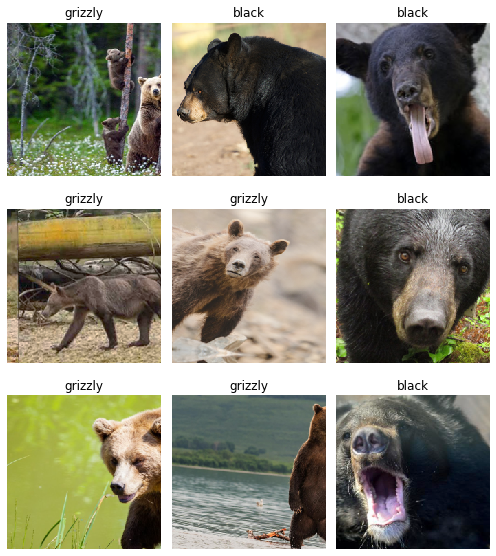

In [0]:
data.show_batch(rows=3,figsize=(7,8))

In [0]:
len(data.valid_ds),len(data.train_ds),data.classes,data.c#how many possible labels are there

(35, 140, ['black', 'grizzly'], 2)

In [0]:
learn=cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 178MB/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.841017,0.168462,0.028571,00:11
1,0.545497,0.352620,0.057143,00:09
2,0.399863,0.546759,0.057143,00:09
3,0.349185,0.618469,0.057143,00:09


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.058533,0.875925,0.142857,00:11
1,0.152539,1.567047,0.142857,00:09
2,0.159835,1.164496,0.085714,00:10


In [0]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (140 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,black,black,black,black
Path: data/bears;

Valid: LabelList (35 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
grizzly,grizzly,grizzly,grizzly,grizzly
Path: data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

In [0]:
learn.lr_find(4)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


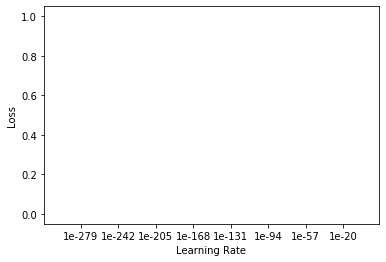

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


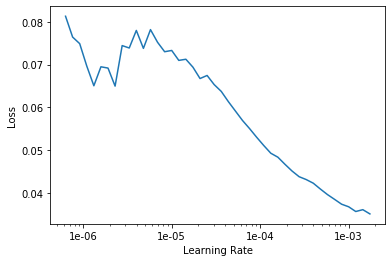

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2,max_lr=slice(1e-5,3e-4))
#we have got very good accuracy

epoch,train_loss,valid_loss,error_rate,time
0,0.020930,0.714500,0.085714,00:10
1,0.021294,0.668195,0.085714,00:10


In [0]:
learn.save('stage-2')

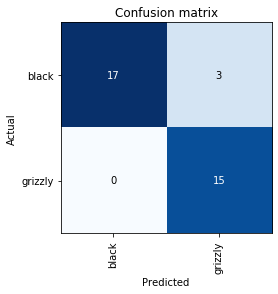

In [0]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

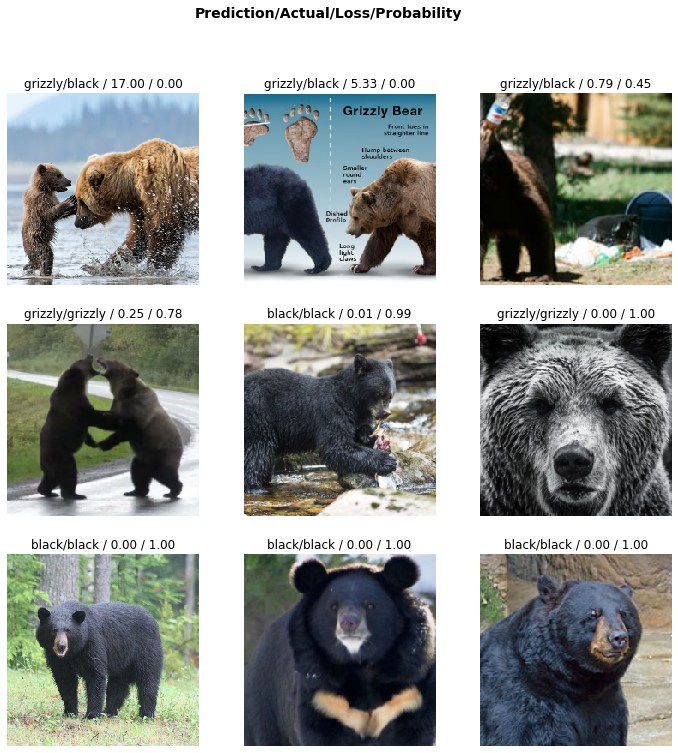

In [0]:
interp.plot_top_losses(9)
#prediction/actual/loss/probability

In [0]:
#classification interpretation contians plot_top_losses that contains prediciton,actual,loss,probabilty; plot_confusion_matrix plots confusion matrix that contains actual vs predicted
#top_losses gives loss and their indexes.

In [0]:
from fastai.widgets import *

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Train)
ImageDeleter(ds, idxs)

In [0]:
losses,idxs=interp.top_losses()#it returns losses and indexes it returns entire data set in sorted order that contains losses initially
top_losses_paths=data.valid_ds.x[idxs]#the indexes contains that have maximum loss thus we  create file path for them
#this removes from valid_ds 

In [0]:
#file deleter was not working

In [0]:
#Model in production

In [0]:
??ImageDeleter

Object `ImageDeleter` not found.


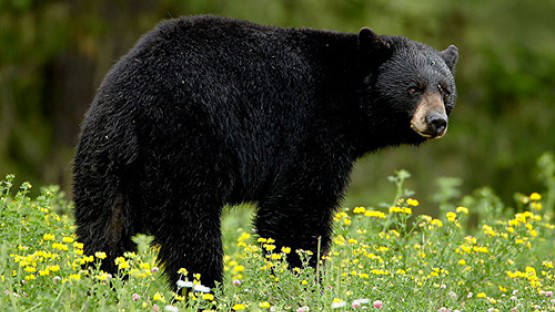

In [0]:
img =open_image(https://www.google.com/search?q=teddy&rlz=1C1CHBF_enIN850IN850&sxsrf=ACYBGNS9RffAOupJa7K3tm3VqYT2wZha2Q:1576684928825&tbm=isch&source=iu&ictx=1&fir=eLKYfUiN3p933M%253A%252CLj3e8O6fKig1eM%252C_&vet=1&usg=AI4_-kSVsvspC3IbHhHzwLMwIoHpKy_pCA&sa=X&ved=2ahUKEwjSvuuIyb_mAhVu4nMBHctQBrgQ9QEwAHoECAkQLg#imgrc=eLKYfUiN3p933M:)
img

In [0]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (140 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,black,black,black,black
Path: data/bears;

Valid: LabelList (35 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
grizzly,grizzly,grizzly,grizzly,grizzly
Path: data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

In [0]:
pred_class,pred_idx,outputs=learn.predict(img)
pred_class

NameError: ignored

In [0]:
"""@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })"""

'@app.route("/classify-url", methods=["GET"])\nasync def classify_url(request):\n    bytes = await get_bytes(request.query_params["url"])\n    img = open_image(BytesIO(bytes))\n    _,_,losses = learner.predict(img)\n    return JSONResponse({\n        "predictions": sorted(\n            zip(cat_learner.data.classes, map(float, losses)),\n            key=lambda p: p[1],\n            reverse=True\n        )\n    })'

In [0]:
#the problems we could face are learning rate and number of epochs

In [0]:
learn=cnn_learner(data,models.resnet34,metrics=error_rate)

In [0]:
learn.fit_one_cycle(5,max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,1.262549,85.700958,0.830189,00:12
1,11.195847,38601031680.000000,0.735849,00:12
2,15.853073,3112226304.000000,0.735849,00:12
3,13.683497,12336490.000000,0.603774,00:12
4,11.958996,140573.109375,0.603774,00:12


In [0]:
learn.fit_one_cycle(5,max_lr=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,5.951308,5397.290039,0.603774,00:13
1,5.423247,369.756592,0.622642,00:12
2,5.617426,17.774658,0.301887,00:12
3,5.628990,13.579378,0.264151,00:12
4,5.859687,13.719994,0.245283,00:12


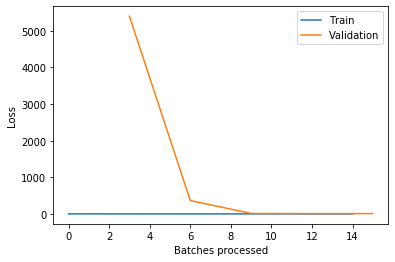

In [0]:
learn.recorder.plot_losses()

In [0]:
#we never want are training loss to be higher than validation loss,it generally means either learning rate is low or number of epochs is low

In [0]:
learn=cnn_learner(data,models.resnet34,metrics=error_rate)

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.613282,0.227546,0.094340,00:12


In [0]:
learn.export()

In [0]:
#too many epochs

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

You can deactivate this warning by passing `no_check=True`.


/usr/local/lib/python3.6/dist-packages/fastai/basic_data.py:247: UserWarning: Your training dataloader is empty, you have only 27 items in your training set.
                 Your batch size is 32, you should lower it.
  Your batch size is {self.train_dl.batch_size}, you should lower it.""")


In [0]:
learn = cnn_learner(data, models.resnet50, ps=0, wd=0)

In [0]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 127))



AssertionError: ignored

In [0]:
#when your error starts increasing thus we say that model is overfitting

## **creating gradient descent from scratch**

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
n=100

In [0]:
#here we are creating array of 1
x=torch.ones(n,2)
#every row of column 0 take uniform_ value from -1 to 1
x[:,0].uniform_(-1.,1)
x[:5]
#x2 is made 1
#y=a1*x1+a2*x2

tensor([[ 0.7414,  1.0000],
        [ 0.1869,  1.0000],
        [-0.3367,  1.0000],
        [ 0.4184,  1.0000],
        [-0.0234,  1.0000]])

In [0]:
#tensor is array, (imp) 3. is necessary for multiplacation
#3. represents slope and 2 represents intercept
a=tensor(3.,2);a

tensor([3., 2.])

In [0]:
#here @ means product ie vector-vector,matrix-vector,vector-matrix,matrix-matrix
#y=x1*a1+a2*1
y=x@a+torch.rand(100)

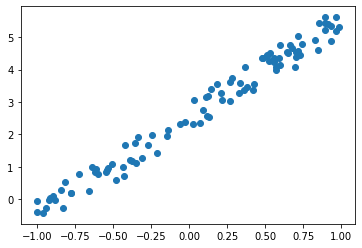

In [0]:
plt.scatter(x[:,0],y)

In [0]:
def mse(y_hat,y):
  return ((y_hat-y)**2).mean()
  #(y-hat-y)^2/n

In [0]:
a=tensor(-1.,1)
#assuming slope and intercept to be -1 and 1

In [0]:
y_hat=x@a
mse(y_hat,y)

tensor(9.4527)

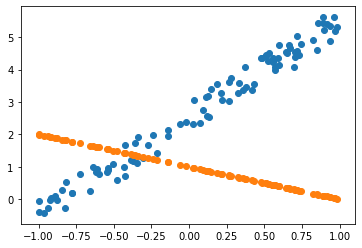

In [0]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat)
#thus it is a wrong guess

In [0]:
#now we would like to find values of a that minimizes mse loss
#Gradient descent is algorithm that minimizes fnctions,gradient descent starts
#with some parameters and iteratively move iteratively towards some set of parameters
#values that minimizes function.

In [0]:
a=nn.Parameter(a);a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
  y_hat=x@a
  loss=mse(y,y_hat)
  if t%10==0: print(loss)
  loss.backward()#gradient is calulated
  with torch.no_grad():
    a.sub_(lr*a.grad)#
    a.grad.zero_()

In [0]:
lr=1e-1
for t in range(100): update()

tensor(9.4527, grad_fn=<MeanBackward0>)
tensor(1.2433, grad_fn=<MeanBackward0>)
tensor(0.3325, grad_fn=<MeanBackward0>)
tensor(0.1347, grad_fn=<MeanBackward0>)
tensor(0.0896, grad_fn=<MeanBackward0>)
tensor(0.0793, grad_fn=<MeanBackward0>)
tensor(0.0769, grad_fn=<MeanBackward0>)
tensor(0.0764, grad_fn=<MeanBackward0>)
tensor(0.0763, grad_fn=<MeanBackward0>)
tensor(0.0762, grad_fn=<MeanBackward0>)


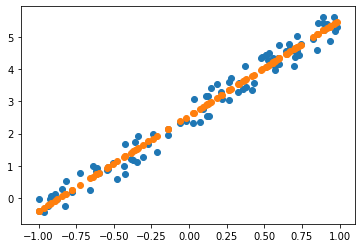

In [0]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a)

In [0]:
from matplotlib import animation, rc
a=nn.Parameter(tensor(-1.,1))
fig=plt.figure()
plt.scatter(x[:,0],x@a)
plt.close()

def animate():
  update()
  line.set_ydata(x@a)
  return line,

animation.FuncAnimation(fig,animate,np.arange(0,100),interval=20)

TypeError: ignored